In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ X ├
     └───┘
c: 3/═════

In [5]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3)
    repetitions *= 2
qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├────■───────────────────────────────────────────────────────»
     ├───┤    │                                                       »
q_1: ┤ H ├────┼─────────■─────────■───────────────────────────────────»
     ├───┤    │         │         │                                   »
q_2: ┤ H ├────┼─────────┼─────────┼─────────■─────────■─────────■─────»
     ├───┤┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐»
q_3: ┤ X ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├»
     └───┘└────────┘└────────┘└────────┘└────────┘└────────┘└────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«               
«q_0: ──────────
«               
«q_1: ──────────
«               
«q_2: ────■─────
«     ┌───┴────┐
«q_3: ┤ P(π/4) ├
«     └────────┘
«c: 3/══════════
«

In [6]:
def qft_dagger(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [7]:
qpe.barrier()
qft_dagger(qpe, 3)
qpe.barrier()
for n in range(3):
    qpe.measure(n, n)

In [8]:
qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├────■───────────────────────────────────────────────────────»
     ├───┤    │                                                       »
q_1: ┤ H ├────┼─────────■─────────■───────────────────────────────────»
     ├───┤    │         │         │                                   »
q_2: ┤ H ├────┼─────────┼─────────┼─────────■─────────■─────────■─────»
     ├───┤┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐»
q_3: ┤ X ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├»
     └───┘└────────┘└────────┘└────────┘└────────┘└────────┘└────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«                ░    ┌───┐                                            ░ ┌─┐   »
«q_0: ───────────░──X─┤ H ├─────■───────────────■──────────────────────░─┤M├───»
«                ░  │ └───┘┌────┴────┐┌───┐     │                      ░ └╥┘┌─┐»
«q_1: ───────────░──┼──────┤ P(-π/2) ├┤ H ├─────┼──────────■───────────░──╫─┤M├»
«                ░  │      └─────────┘└───┘┌────┴────┐┌────┴────┐┌───┐ ░  ║ └╥┘»
«q_2: ────■──────░──X──────────────────────┤ P(-π/4) ├┤ P(-π/2) ├┤ H ├─░──╫──╫─»
«     ┌───┴────┐ ░                         └─────────┘└─────────┘└───┘ ░  ║  ║ »
«q_3: ┤ P(π/4) ├─░─────────────────────────────────────────────────────░──╫──╫─»
«     └────────┘ ░                                                     ░  ║  ║ »
«c: 3/════════════════════════════════════════════════════════════════════╩══╩═»
«                                                                         0  1 »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«q_3: ─╫─
«      ║ 
«c: 3/═╩═
«      2

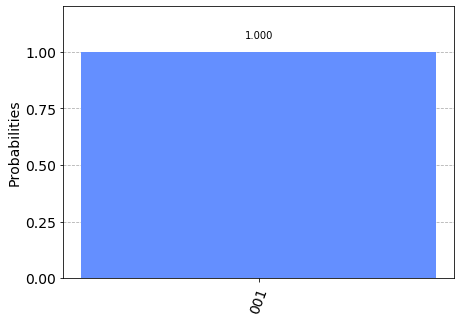

In [9]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [10]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

┌───┐                                                                  »
q_0: ┤ H ├─────■────────────────────────────────────────────────────────────»
     ├───┤     │                                                            »
q_1: ┤ H ├─────┼──────────■──────────■──────────────────────────────────────»
     ├───┤     │          │          │                                      »
q_2: ┤ H ├─────┼──────────┼──────────┼──────────■──────────■──────────■─────»
     ├───┤┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐»
q_3: ┤ X ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├»
     └───┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                   ┌───┐                                      ┌─┐           
«q_0: ────────────X─┤ H ├─────■───────────────■────────────────┤M├───────────
«                 │ └───┘┌────┴────┐┌───┐     │                └╥┘     ┌─┐   
«q_1: ────────────┼──────┤ P(-π/2) ├┤ H ├─────┼──────────■──────╫──────┤M├───
«                 │      └─────────┘└───┘┌────┴────┐┌────┴────┐ ║ ┌───┐└╥┘┌─┐
«q_2: ─────■──────X──────────────────────┤ P(-π/4) ├┤ P(-π/2) ├─╫─┤ H ├─╫─┤M├
«     ┌────┴────┐                        └─────────┘└─────────┘ ║ └───┘ ║ └╥┘
«q_3: ┤ P(2π/3) ├───────────────────────────────────────────────╫───────╫──╫─
«     └─────────┘                                               ║       ║  ║ 
«c: 3/══════════════════════════════════════════════════════════╩═══════╩══╩═
«                                                               0       1  2

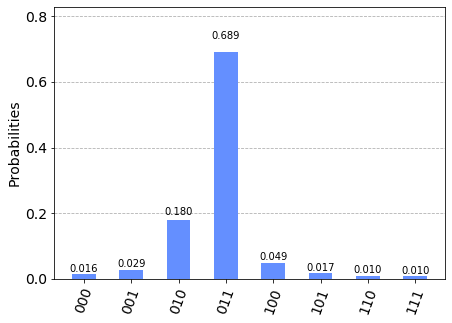

In [11]:
# Let's see the results!
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [12]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw()

┌───┐                                                                  »
q_0: ┤ H ├─────■────────────────────────────────────────────────────────────»
     ├───┤     │                                                            »
q_1: ┤ H ├─────┼──────────■──────────■──────────────────────────────────────»
     ├───┤     │          │          │                                      »
q_2: ┤ H ├─────┼──────────┼──────────┼──────────■──────────■──────────■─────»
     ├───┤     │          │          │          │          │          │     »
q_3: ┤ H ├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────»
     ├───┤     │          │          │          │          │          │     »
q_4: ┤ H ├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────»
     ├───┤┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐»
q_5: ┤ X ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├»
     └───┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
c: 5/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                       »
«q_0: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_1: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_2: ─────■────────────────────────────────────────────────────────────»
«          │                                                            »
«q_3: ─────┼──────────■──────────■──────────■──────────■──────────■─────»
«          │          │          │          │          │          │     »
«q_4: ─────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────»
«     ┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐»
«q_5: ┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├»
«     └─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
«c: 5/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                                                                       »
«q_0: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_1: ──────────────────────────────────────X───────────────────────────»
«                                           │                           »
«q_2: ──────────────────────────────────────┼───────────────────────────»
«                                           │                           »
«q_3: ─────■──────────■──────────■──────────X───────────────────────────»
«          │          │          │                                      »
«q_4: ─────┼──────────┼──────────┼──────────■──────────■──────────■─────»
«     ┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐»
«q_5: ┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├»
«     └─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
«c: 5/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                                                                       »
«q_0: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_1: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_2: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_3: ──────────────────────────────────────────────────────────────────»
«                      

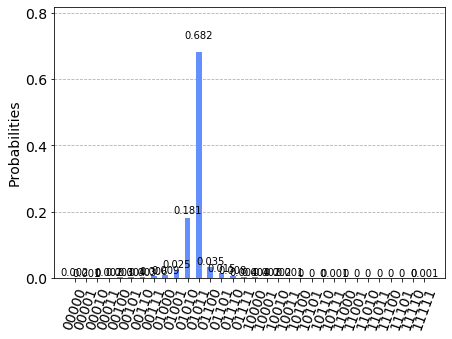

In [13]:
### Let's see the results!

backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe3, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)